In [33]:
import numpy as np
from numpy import random
import scipy
from scipy.stats import beta
from scipy.stats import uniform
from scipy.stats import norm
from scipy.optimize import minimize
from matplotlib import pyplot as plt
import math

# Rejection Method
The probability density function for beta is:
\begin{align*}
    f(x,a,b)=\frac{Γ(a+b)x^{a−1}∗(1−x)^{b−1}}{Γ(a)Γ(b)}
\end{align*}
for $0<=x<=1$, $a>0$, $b>0$, where $Γ$ is the gamma function (scipy.special.gamma()). beta takes a and b as shape paramters. In this exercise, we will use two different sampling methods to generate $beta(\alpha=5,\beta=3)$. See the distribution below. In this lab, we will try two different simulation methods and compare their performance.



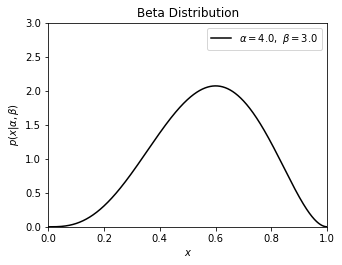

In [5]:
x = np.linspace(0, 1, 1002)[1:-1]
fig, ax = plt.subplots(figsize=(5, 3.75))
a=4
b=3
dist = beta(a, b)
plt.plot(x, dist.pdf(x), ls="-", c='black',label=r'$\alpha=%.1f,\ \beta=%.1f$' % (a, b))

plt.xlim(0, 1)
plt.ylim(0, 3)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|\alpha,\beta)$')
plt.title('Beta Distribution')

plt.legend(loc=0)
plt.show()

### a. Uniform Sampling

In [9]:
# Find max of beta, beta_max
a = 5
b = 3
d = beta(a, b)

# beta_max
x_max = (a - 1) / (a + b - 2)
beta_max = d.pdf(x_max)

# Generate a uniform distribution sample x between [0,1]
x = random.uniform(low=0., high=1.0, size=1000)

# Generate another uniform distribution sample between [0, beta_max]
y = random.uniform(low=0., high=beta_max, size=1000)

# For each x_i, compute the event weight w(x_i) and only keep x_i when w(x_i)<y w(x)=f(x)/g(x)=targetdist/pdf

# def g(x):
#     return norm.pdf(x)

# def w(x_i):
#     return f(x_i) / g(x_i)
   
    
def keep(N):   
    i = 0
    accept = np.zeros(N)
    iterations = 0 
    def W(x):
        a = 4
        b = 5
        return beta.pdf(x, a, b)
    while i < N:
        iterations = iterations + 1
        x = random.uniform(low=0., high=1.0, size=1)
        y = random.uniform(low=0., high=beta_max, size=1)
        w = W(x)
        if w >= y:            
            accept[i] = x
            i = i + 1
    return accept, iterations

#Generate this sample until accepted events N=1000 events
keep, iterations = keep(1000)

print(iterations)


2403


1. What is the event weight formula? <br>
The event weight formula is 
\begin{gather*}
w(x) = \frac{f(x)}{g(x)} \\
\end{gather*}
where, for a sample of y that we are comparing w(x) to that is uniform on the scaled interval $[0, beta_{max}]$
\begin{gather*}
g(x) = 1  \\
so, \\
w(x) = \beta(\alpha=4, \beta=5)
\end{gather*}

2. What is the total number of samplings (pairs of x, y) required for this MC simulation? <br>
The total number of samplings (pairs of x, y) required for this MC simulation is 2404, given by 2404 iterations of the while loop , which runs i number of iterations of adding points to the accepted values array until the desired i=N=1000 entries are filled. When i is no longer less than N, meaning that the array has N=1000 entries of acceptable points' x values, the while loop will break. Each iteration of the loop is kept track of by a counter, named iterations in this case, which starts from 0 and counts the number of samples taken by increasing by 1 with every pass through the while loop. <br>
We can see that to get N=1000 accepted values, we had to take over twice as many sample points from the uniform distributution. This shows that this method of sampling to model the target function (beta function) is inefficient, as we are rejecting more points than accepting for a given N. This makes sense, as the shape of the uniform distribution does not at all resemble that of the beta distribution, so there are many points under the uniform distribution that are not also under the beta distribution. 

### b. Gaussian Sampling

In [145]:
def keep2(N):   
    i = 0
    accept = np.zeros(N)
    def W(x):
        a = 4
        b = 5
        return beta.pdf(x, a, b) 
    iterations2 = 0
    while i < N:
        x = random.normal(loc=0.6, scale=0.2,size=1)
        y = random.uniform(low=0., high=beta_max, size=1)
        w = W(x)
        iterations2 = iterations2 + 1
        if w >= y:            
            accept[i] = x
            i = i + 1
    return accept, iterations2

#Generate this sample until accepted events N=1000 events
keep, iterations2 = keep2(1000)
print('The number of samples required for N=1000 accepted events is ' + str(iterations2))


The number of samples required for N=1000 accepted events is 1831


1. What is your choice of Gaussian distribtuion parameter for the importance sample? <br>
I chose a mean of 0.6 and standard deviation of 0.2 such that the normal distribution that we are sampling from has a shape that more closely resembles the beta distribution. The mean shifts the normal distribution such that its peak more closely matches the peak of the beta distribution and the standard deviation adjsuts the width of the entire distribition such that it also more closely matches that of the beta distribuition we are trying to model. 
2. What is the event weight formula? <br>
The event weight formula is, like before, 
\begin{gather*}
w(x) = \frac{f(x)}{g(x)} \\
\end{gather*}
where, for a sample of y that we are comparing w(x) to that is uniform on the scaled interval $[0, beta_{max}]$
\begin{gather*}
g(x) = 1  \\
so, \\
w(x) = \beta(\alpha=4, \beta=5)
\end{gather*}

3. What is the total number of sampling (pairs of x, y) required for this MC simulation? How is this compared with the uniform sampling? <br>
The total number of sampling pairs is 1842 to get N=1000 accepted values. This is far less than the number of samples required when sampling from the uniform distribution, which makes sense as the normal distribution more closely resembles the beta distribition, so the probability of a sample of the normal distribtion at a given x having a value that fits within the beta distribution is higher than that with the sample of the uniform distribution. Thus, sampling from a normal distribution with the given mean and standard deviation parameters is a much more efficient method to model the target distribution than the previous method of sampling from a uniform distribution. 


### c. Visualize

# Sphere in 3D
In this exercise we are going to calculate the mass of a 3D sphere with linearly increasing density. This problem is quite challenging to do analytically, but with Monte Carlo integration it is relatively easy.   <br>
Let's first start with the simple problem of determining the mass of a sphere with uniform density 
ρ0=2kg/m3. The sphere has a radius of 1 meter, and we initially integrate it with N=100 points.

### a. Uniform Density
The integral for the volume of a sphere of radius 1 centered at (0,0) is 
\begin{equation*}
\int_{-1}^{1}
\end{equation*}
Using the Monte Carlo Integration Method, the mass is calculated by:
\begin{gather*}
m = \frac{V}{N}\sum_{i=1}^{N}f(x,y,z)
\end{gather*}
where $V$ is the volume of the cube from which the sample points are taken.

theoretical mass= 8.377580409572781
The mass for N=100 using Monte Carlo integration is 8.96
The associated uncertainty for N=100 is 0.008639999999999997


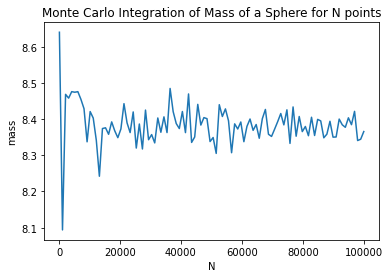

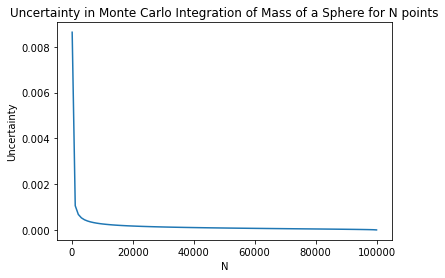

In [153]:
theoretical_mass = (8 / 3) * math.pi
print('theoretical mass= ' + str(theoretical_mass))

# Generate function to calculate mass for N samples
def mass(N):
    points = np.zeros((N, 3))
    points[:, 0] = np.random.uniform(low=-1, high=1, size=N) # Generate N pointsm (xyz) in cube of length 2 centered at origin
    points[:, 1] = np.random.uniform(low=-1, high=1, size=N)
    points[:, 2] = np.random.uniform(low=-1, high=1, size=N)
    def inside_sphere(points): # function makes an array to append 1 (hit) or 0 (miss) for condition of inside sphere of radius=1
        inside = []
        for i in range(N):
            radius = np.sqrt(points[i, 0] ** 2 + points[i, 1] **2 + points[i, 2] ** 2) #eqn of sphere
            if  radius < 1:
                inside.append(1)
            else:
                inside.append(0)
        return inside
    inside = inside_sphere(points)
    m = 8 * 2 * np.count_nonzero(inside) / N #V/N *2*count f is sum density*hit
    return m

# Find mass using samples of 100 to 100k in 100 steps
Y = np.linspace(100, 100000, 100, dtype = int)
m_list = np.zeros(100)
m_variance = np.zeros(100)
uncertainty = np.zeros(100)

for i in range(100):
    m_val = mass(Y[i])
    m_list[i] = m_val # list of masses from N of 100 to 100k in 100 steps
    uncertainty[i] = np.sqrt(np.var(m_list) / (Y[i] * (Y[i] - 1))) # The mean squared error
    
m_100 = (mass(100))   
print('The mass for N=100 using Monte Carlo integration is ' + str(m_100))
uncertainty_100 = uncertainty[0]
print('The associated uncertainty for N=100 is ' + str(uncertainty_100))                     

# plot mass as a function of N and uncertainty as a function of N

plt.plot(Y, m_list)
plt.xlabel('N')
plt.ylabel('mass')
plt.title('Monte Carlo Integration of Mass of a Sphere for N points')
plt.show()

plt.plot(Y, uncertainty)
plt.xlabel('N')
plt.ylabel('Uncertainty')
plt.title('Uncertainty in Monte Carlo Integration of Mass of a Sphere for N points')
plt.show()


The monte carlo method converges at a rate of 1/N^2, which can be seen by the shape of the plots of uncertainty as a function of N. Because of the 1/N^2 dependence on the uncertainty, we should see that the fluctuations of the graph of calculated mass values as a function of N around the theoretical mass of 8.37 get smaller with increasing N (following the law of statistics).  

### b. Linear Density
Given linear Density of $p(r) = p_0*r$, the nth moment of the mass distribution is  
\begin{gather*}
m_n = \sum_{j=1}^{N}x^{n}_{j}\delta{m_j}
\end{gather*}



In [155]:
# Function to determine mass of sphere by monte carlo integration
def mass2(N):
    points = np.zeros((N, 3))
    points[:, 0] = np.random.uniform(low=-1, high=1, size=N) # Generate N points (xyz) in cube of length 2 centered at origin
    points[:, 1] = np.random.uniform(low=-1, high=1, size=N)
    points[:, 2] = np.random.uniform(low=-1, high=1, size=N) 
    def inside_sphere2(points): # function makes an array to append 1 (hit) or 0 (miss) for condition of inside sphere of radius=1
        inside = []
        radius = np.zeros(N)
        for i in range(N):
            radius[i] = np.sqrt(points[i, 0] ** 2 + points[i, 1] **2 + points[i, 2] ** 2)
            if radius[i] < 1:
                inside.append(1)
            else:
                inside.append(0)
        return inside, radius
    inside, r = inside_sphere2(points) 
    p_0 = 2      
    f_sum = 0 
    for j in range(N):
        density = p_0 * r[j]
        f_sum = f_sum + (density * inside[j])   
    m = (8 / N) * f_sum
    return m

# Calculation of mass for N=100
print('The mass of the sphere for N=100 is ' + str(mass2(100)))    



# Calculation of mass estimates for N from 100 to 100k in 100 steps
Z = np.linspace(100, 100000, 100, dtype = int)
step_m_list = np.zeros(100)

for i in range(100):
    m_val = mass(Y[i])
    m_list[i] = m_val # list of masses from N of 100 to 100k in 100 steps
    
    
# Calculation of uncertainties for 200 samples and minimum number of samples for an uncertainty less than 0.01
Y = np.linspace(2, 202, 200, dtype = int)
m_list = np.zeros(200)
m_variance = np.zeros(200)
uncertainty = np.zeros(200)

for i in range(200):
    m_val = mass2(Y[i])
    m_list[i] = m_val 
    uncertainty[i] = np.sqrt(np.var(m_list) / (Y[i] * (Y[i] - 1))) # The mean squared error
  
    
loops = np.asarray(np.where(uncertainty<0.01))
minimum_loops = loops[:, 1]

print('The sampling N that is large enough for uncertainty < 0.01 is ' + str(minimum_loops))



The mass of the sphere for N=100 is 5.789623959615385
The sampling N that is large enough for uncertainty < 0.01 is [187]


### Bonus
Consider a density that is an unit exponential function of the radius according to
\begin{gather*}
p(r)=\frac{1}{p_0}e^{-p_0r}
\end{gather*}

In [158]:
def mass3(N):
    points = np.zeros((N, 3))
    points[:, 0] = np.random.uniform(low=-1, high=1, size=N) # Generate N points (xyz) in cube of length 2 centered at origin
    points[:, 1] = np.random.uniform(low=-1, high=1, size=N)
    points[:, 2] = np.random.uniform(low=-1, high=1, size=N) 
    def inside_sphere3(points): # function makes an array to append 1 (hit) or 0 (miss) for condition of inside sphere of radius=1
        inside = []
        radius = np.zeros(N)
        for i in range(N):
            radius[i] = np.sqrt(points[i, 0] ** 2 + points[i, 1] **2 + points[i, 2] ** 2)
            if radius[i] < 1:
                inside.append(1)
            else:
                inside.append(0)
        return inside, radius
    inside, r = inside_sphere3(points) 
    p_0 = 2      
    f_sum = 0 
    for j in range(N):
        density = (1 / p_0) * np.exp(-p_0 * r[j])
        f_sum = f_sum + (density * inside[j])   
    m = (8 / N) * f_sum
    return m

print('The calculated mass for N=100 is ' + str(mass3(100)))



The calculated mass for N=100 is 0.5041343187941645
